In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
from scipy.special import genlaguerre
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive, IntSlider, FloatSlider
import ipywidgets as widgets
from IPython.display import display, clear_output

Функція laguerre_function обчислює значення функції Лагерра за заданими параметрами t (час), n (степінь полінома), beta та sigma. Використовується рекурсивна формула для обчислення поліномів Лагерра.Також тут використаний віджет, який змінює графік залежно від значень

In [12]:
# 1.5(1) Laguerre function using the given recursive formula
def laguerre_function(t, n, beta=2, sigma=4):
    l_0 = np.sqrt(sigma) * np.exp(-beta * t / 2)
    if n == 0:
        return l_0
    l_1 = np.sqrt(sigma) * (1 - sigma * t) * np.exp(-beta * t / 2)
    if n == 1:
        return l_1
    for i in range(2, n + 1):
        l_next = ((2 * i - 1 - sigma * t) * l_1 - (i - 1) * l_0) / i
        l_0, l_1 = l_1, l_next
    return l_next

In [13]:
print(laguerre_function(1,3))

1.7167707254667308


Функція tabulate_laguerre табулює значення функції Лагерра на інтервалі від 0 до T із заданими параметрами n, beta та sigma. Генерує графік функції та повертає DataFrame з обчисленими значеннями.Також тут використаний віджет, який змінює графік залежно від значень Max t, n,Beta,Sigma

In [14]:
# 1.5(2) Function for tabulating values of the Laguerre function
def tabulate_laguerre(T, n, beta, sigma):
    steps = np.linspace(0, T, 100)
    values = laguerre_function(steps, n, beta, sigma)
    
    plt.figure(figsize=(6, 5)) 
    plt.plot(steps, values, label=f'Laguerre function for n={n}')  
    plt.xlabel('t') 
    plt.ylabel(f'L_{n}(t)')  
    plt.title(f'Graph of Laguerre Function L_{n}(t)') 
    plt.ylim(min(values), max(values)) 
    plt.grid(True)  
    plt.legend()  
    plt.show()  
    
    result_df=pd.DataFrame({'steps' : steps, 'values' : values})
    return result_df.round(6)

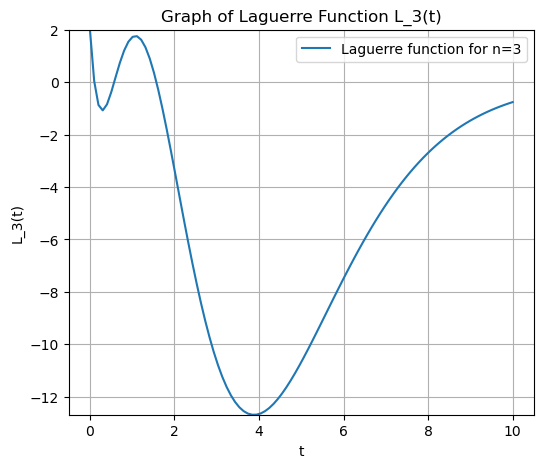

,steps,values
0,0.00000,2.000000
1,0.10101,0.039336
2,0.20202,-0.870509
3,0.30303,-1.077321
4,0.40404,-0.846646
...,...,...
95,9.59596,-0.996848
96,9.69697,-0.932452
97,9.79798,-0.871877
98,9.89899,-0.814929


In [15]:
tabulate_laguerre(10,3,2,4)

In [27]:
def tabulate_laguerre(T, n, beta, sigma):
    steps = np.linspace(0, T, 100)
    values = laguerre_function(steps, n, beta, sigma)
    
    plt.figure(figsize=(4, 3)) 
    plt.plot(steps, values, label=f'Laguerre function for n={n}')  
    plt.xlabel('t') 
    plt.ylabel(f'L_{n}(t)')  
    plt.title(f'Graph of Laguerre Function L_{n}(t)') 
    plt.ylim(min(values), max(values)) 
    plt.grid(True)  
    plt.legend()  
    plt.show()  
    plt.savefig('lagguere_func.png')
    result_df = pd.DataFrame({'steps': steps, 'values': values})
    return result_df.round(6)

T_slider = FloatSlider(min=0.1, max=10, step=0.1, value=5, description='Max t:')
n_slider = IntSlider(min=0, max=20, step=1, value=1, description='n:')
beta_slider = FloatSlider(min=0.1, max=10, step=0.1, value=2, description='Beta:')
sigma_slider = FloatSlider(min=0.1, max=10, step=0.1, value=4, description='Sigma:')

interactive_tabulate = interactive(tabulate_laguerre, T=T_slider, n=n_slider, beta=beta_slider, sigma=sigma_slider)
interactive_tabulate

interactive(children=(FloatSlider(value=5.0, description='Max t:', max=10.0, min=0.1), IntSlider(value=1, desc…

Функція simple_experiment проводить експеримент для знаходження такого T, при якому всі значення функції Лагерра для степенів від 1 до N менші за задану точність epsilon

In [17]:
# 1.5(3) Function for conducting a simple experiment to find T
def simple_experiment(T, beta, sigma, epsilon=1e-3, N=20):
    t_values = np.linspace(0, T, 1000)
    n_values = range(1, N + 1)
    
    df = pd.DataFrame({'t': t_values})

    for n in n_values:
        df[f'L_{n}'] = [laguerre_function(t, n, beta, sigma) for t in t_values]

    result = next((t for t in t_values if all(abs(laguerre_function(t, n, beta, sigma)) < epsilon for n in n_values)), None)

    return result, df.round(7)

In [18]:
T_found, df_laguerre = simple_experiment(100, 2, 4)
print("First t where condition is met:", T_found)
df_laguerre

First t where condition is met: 79.07907907907908


,t,L_1,L_2,L_3,L_4,L_5,L_6,L_7,L_8,L_9,...,L_11,L_12,L_13,L_14,L_15,L_16,L_17,L_18,L_19,L_20
0,0.0000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,0.1001,1.084972,0.505499,0.051717,-0.293797,-0.546681,-0.720935,-0.829059,-0.882172,-0.890137,...,-0.804416,-0.725098,-0.629547,-0.522817,-0.409246,-0.292532,-0.175794,-0.061631,0.047823,0.150846
2,0.2002,0.326116,-0.459970,-0.861246,-0.989781,-0.934086,-0.763004,-0.529074,-0.271425,-0.018253,...,0.404167,0.554208,0.658568,0.717803,0.734768,0.713898,0.660627,0.580924,0.480932,0.366683
3,0.3003,-0.298017,-1.008633,-1.078519,-0.807054,-0.395996,0.025832,0.382965,0.637955,0.779466,...,0.755060,0.626187,0.449367,0.246621,0.037642,-0.161102,-0.336771,-0.480207,-0.585735,-0.650807
4,0.4004,-0.806208,-1.233752,-0.860121,-0.235505,0.339624,0.728242,0.894721,0.861267,0.678262,...,0.097484,-0.197350,-0.445191,-0.624399,-0.724991,-0.746724,-0.696828,-0.587703,-0.434780,-0.254686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99.5996,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
996,99.6997,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
997,99.7998,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
998,99.8999,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000


In [19]:
Функція integral_quad чисельно обчислює інтеграл заданої функції f на інтервалі від a до b, використовуючи метод трапецій із N рівномірно розподіленими точками.

Функція laguerre_transform обчислює перетворення Лагерра для функції f до max_k-го порядку, використовуючи вагову функцію e^(-alpha * t), де alpha це різниця між sigma та beta. Кожен компонент перетворення fk вираховується за допомогою інтегрування добутку f(t), функції Лагерра, і вагової функції на інтервалі від 0 до T.

SyntaxError: invalid syntax (2998207826.py, line 1)

In [ ]:
# Calculate the integrals for 1.5(4)
def integral_quad(f, a, b, N=1000):
    x = np.linspace(a, b, N)
    s = sum([f(i) for i in x])
    return s * abs(b - a) / N

def laguerre_transform(f, max_k, beta, sigma):
    alpha = sigma - beta
    fk = np.zeros(max_k + 1)
    for k in range(max_k + 1):
        def integrand(t):
            return f(t) * laguerre_function(t, k, beta, sigma) * np.exp(-alpha * t)
        fk[k] = integral_quad(integrand, 0, 100)
    return fk

def f(t):
    return np.exp(-t) * np.sin(t)

In [20]:
fk = laguerre_transform(f, 3, 2, 4)
print(fk)

[ 0.1158741  -0.10533131 -0.02070335  0.00231375]


In [21]:
Для заданої функції f(t) виконується обчислення коефіцієнтів. Код обчислює ці коефіцієнти для заданої функції та виводить результати.

SyntaxError: invalid syntax (2843930294.py, line 1)

In [22]:
#1.5(5) laguerre coefficients
def f(t):
    if 0 <= t < 2 * np.pi:
        return np.sin(t - np.pi / 2) + 1
    else:
        return 0

def transform_laguerre_tabulation(f, max_n):
    results = [{'n': n, 'Ln': laguerre_transform(f, n, beta=2, sigma=4)} for n in range(max_n)]
    df = pd.DataFrame(results).set_index('n')
    return df

T = 100  
max_n = 20  
df = transform_laguerre_tabulation(f, max_n)

last_elements_df = pd.DataFrame({
    'n': df.index,
    'Last Ln': [row['Ln'][-1] for index, row in df.iterrows()]
}).set_index('n')

last_elements_df

,Last Ln
n,
0,0.066598
1,-0.182046
2,0.177887
3,-0.074228
4,0.007241
5,0.007563
6,-0.003114
7,-0.000636
8,0.000775


Функція inverse_laguerre_transform обчислює суму значень функцій Лагерра, помножених на відповідні коефіцієнти зі списку h для заданого аргументу t. Це виконує обернене перетворення Лагерра, яке може бути використане для реконструкції оригінальної функції з її перетворення Лагерра.

In [23]:
#1.5(6)
h = last_elements_df['Last Ln'].tolist()
def inverse_laguerre_transform(h, t):
    total = 0
    for k in range(len(h)):
         total += h[k] * laguerre_function(t, k)
    return total

result = inverse_laguerre_transform(h, 2)
print(result)

1.414760310213621


Функція laguerre_polynomials_plots генерує графіки функцій Лагерра для степенів від 0 до n_max на інтервалі часу від 0 до max_t. Для кожного степеня n, вона обчислює значення полінома Лагерра в заданих точках t_values, використовуючи задані параметри beta та sigma, і побудовує графік цих значень. Також тут використаний віджет слайдер, який змінює графік залежно від значень Max t, n, Beta, Sigma

In [32]:
#1.5(7)
def laguerre_polynomials_plots(max_t, n_max, beta, sigma):
    t_values = np.linspace(0, max_t, 500)  
    plt.figure(figsize=(8, 5)) 

    for n in range(n_max + 1):
        values = [laguerre_function(t, n, beta, sigma) for t in t_values]
        plt.plot(t_values, values, label=f'$L_{{{n}}}(t)$')

    plt.title('Laguerre')
    plt.xlabel('t')
    plt.ylabel('Laguerre Function Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('lagguere.png')

# Creating sliders for the parameters
max_t_slider = FloatSlider(min=0.1, max=10, step=0.1, value=4, description='Max t:')
n_max_slider = IntSlider(min=1, max=20, step=1, value=20, description='Max n:')
beta_slider = FloatSlider(min=0.1, max=10, step=0.1, value=2, description='Beta:')
sigma_slider = FloatSlider(min=0.1, max=10, step=0.1, value=4, description='Sigma:')

# Creating an interactive plot
interactive_plot = interactive(laguerre_polynomials_plots, max_t=max_t_slider, n_max=n_max_slider, beta=beta_slider, sigma=sigma_slider)
interactive_plot

interactive(children=(FloatSlider(value=4.0, description='Max t:', max=10.0, min=0.1), IntSlider(value=20, des…

Функція inverse_laguerre_transform виконує обернене перетворення Лагерра, сумуючи добутки коефіцієнтів coefs та значень функції Лагерра для кожного порядку n і заданого аргументу t. Результати оберненого перетворення для масиву значень t від 0 до 2π візуалізуються на графіку. Також тут є віджет слайдер, який змінює графік залежно від значень  Max t, n, Beta, Sigma

In [25]:
#1.5(8)
def inverse_laguerre_transform(coefs, t, beta, sigma):
    return sum(coef * laguerre_function(t, n, beta, sigma) for n, coef in enumerate(coefs))

def plot_inverse_transform(max_n, t_max, beta, sigma):
    t_values = np.linspace(0, t_max, 1000)
    coefficients = [1] * (max_n + 1)
    inverse_transform_values = [inverse_laguerre_transform(coefficients, t, beta, sigma) for t in t_values]
    
    plt.plot(t_values, inverse_transform_values)
    plt.title('Inverse Laguerre Transform')
    plt.xlabel('t')
    plt.ylabel('f^N(t)')
    plt.grid(True)
    plt.show()
    plt.savefig('lagguere_inverse.png')


# Creating sliders for the parameters
max_n_slider = IntSlider(min=1, max=20, step=1, value=5, description='Max n:')
t_max_slider = FloatSlider(min=0.1, max=10, step=0.1, value=2 * np.pi, description='Max t:')
beta_slider = FloatSlider(min=0.1, max=10, step=0.1, value=2, description='Beta:')
sigma_slider = FloatSlider(min=0.1, max=10, step=0.1, value=4, description='Sigma:')

# Creating an interactive plot
interactive_plot = interactive(plot_inverse_transform, max_n=max_n_slider, t_max=t_max_slider, beta=beta_slider, sigma=sigma_slider)
interactive_plot

interactive(children=(IntSlider(value=5, description='Max n:', max=20, min=1), FloatSlider(value=6.28318530717…

In [33]:
#1.5(9)my own plot
def L_n(t, n):
    return np.cos(n * t)**4 

# Function to plot with interactive widget
def plot_Laguerre_functions(max_n):
    t_values = np.linspace(0, 4 * np.pi, 1000)
    plt.figure(figsize=(8, 4))
    for n in range(max_n + 1):
        L_values = L_n(t_values, n)
        plt.plot(t_values, L_values, label=f'L_{n}(t)')
    plt.title('Laguerre Functions L_n(t)')
    plt.xlabel('t')
    plt.ylabel('Values')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig('lagguere_func_my.png')

# Creating a slider widget for 'max_n'
max_n_slider = IntSlider(min=1, max=10, step=1, value=5, description='Max n:')

# Creating an interactive plot
interactive_plot = interactive(plot_Laguerre_functions, max_n=max_n_slider)
interactive_plot

interactive(children=(IntSlider(value=5, description='Max n:', max=10, min=1), Output()), _dom_classes=('widge…

У цій лабораторній роботі було досліджено поліноми Лагерра через чисельні методи, що включали рекурсивні обчислення, чисельне інтегрування та обернене перетворення Лагерра. Експериментальний підхід допоміг визначити специфічні властивості цих поліномів, особливо у контексті оптимізації та аналізу. Графічне представлення результатів забезпечило наочність та допомогло краще зрозуміти поведінку поліномів.